In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy.polynomial.polynomial import polyfit
import sklearn
from sklearn import datasets
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import datetime
import os
import graphviz
from graphviz import Source
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df0 = pd.read_csv("jplus_sspp.txt",sep=' ')
df0

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,0355-51788-0064,260.550224,56.905830,6076,4.213,-1.151,F5,17.526304,17.207840,17.092297,16.758161,16.709351,16.497959,16.416205,16.138050,16.092394,15.971630,15.972558,15.942645
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
3,0357-51813-0550,261.044995,56.208497,5646,3.337,-2.025,F5,18.129843,17.700920,17.620277,17.401062,17.290638,17.016707,16.900097,16.544029,16.492199,16.293610,16.253666,16.225510
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
6,0358-51818-0277,262.237362,56.366903,5721,4.479,-1.217,G2,17.471108,17.288258,17.161781,16.844524,16.734047,16.398077,16.264748,15.911975,15.878081,15.702483,15.685789,15.634157
7,0358-51818-0518,263.326016,57.008204,6048,4.040,-1.784,F5,19.284329,18.835606,18.813152,18.524963,18.693676,18.337357,18.269838,17.958914,17.886160,17.780407,17.740013,17.762138
8,0358-51818-0522,264.092504,57.595325,6404,4.225,-1.665,F5,19.019474,18.665943,18.536802,18.377125,18.193298,18.045948,17.902924,17.715183,17.698460,17.632582,17.557308,17.597729
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750


In [4]:
df1=df0[df0.TEFF>7500]
df1

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750
10,0358-51818-0555,264.506016,56.763370,7520,4.089,-1.113,A0,19.402348,18.737839,18.453316,18.196552,18.245270,18.057793,18.007175,18.026157,18.103848,18.115112,18.170582,18.111418
11,0358-51818-0584,264.708855,57.026715,7779,4.026,-1.211,A0,17.947752,17.322285,16.955818,16.784756,16.709492,16.719286,16.684387,16.676348,16.743443,16.719650,16.762789,16.744406
12,0367-51997-0605,261.364546,56.563424,7969,4.390,-1.337,A0,19.186386,18.780720,18.335800,17.916233,17.966175,17.914108,17.929800,18.006424,18.050779,18.041815,18.167316,18.161669
15,0431-51877-0414,113.938322,38.840945,8222,4.294,-1.154,A0,18.739458,18.199085,17.845818,17.489750,17.539259,17.419884,17.486351,17.492248,17.574257,17.573921,17.572670,17.647156
16,0432-51884-0187,115.168512,39.870432,7658,3.110,-1.511,A0,17.000877,16.193214,15.867228,15.629083,15.655346,15.595911,15.558558,15.534168,15.612087,15.567967,15.589592,15.619976


In [5]:
#Colors Indexes:
(uJAVA_J0378) = df1.uJAVA - df1.J0378
(uJAVA_J0410) = df1.uJAVA - df1.J0410
(uJAVA_J0660) = df1.uJAVA - df1.J0660
(uJAVA_J0861) = df1.uJAVA - df1.J0861
(J0378_J0410) = df1.J0378 - df1.J0410
(J0378_J0660) = df1.J0378 - df1.J0660
(J0378_J0861) = df1.J0378 - df1.J0861
(J0410_J0660) = df1.J0410 - df1.J0660
(J0410_J0861) = df1.J0410 - df1.J0861
(J0660_J0861) = df1.J0660 - df1.J0861
(gSDSS_rSDSS) = df1.gSDSS - df1.rSDSS

In [6]:
df2 = pd.DataFrame ({"LOGG": df1.LOGG, "uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})
df2

,LOGG,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,3.306,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,4.501,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,3.411,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,3.493,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,3.551,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,4.089,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,4.026,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,4.390,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,4.294,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
16,3.110,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495,0.061743


In [7]:
max1T=df2['uJAVA_J0378'].mean()+2*df2['uJAVA_J0378'].std()
min1T=df2['uJAVA_J0378'].mean()-2*df2['uJAVA_J0378'].std()
print(max1T)
print(min1T)
max1L = df2['J0410_J0861'].mean()+1*df2['J0410_J0861'].std()
min1L = df2['J0410_J0861'].mean()-1*df2['J0410_J0861'].std()
max2L = df2['J0410_J0660'].mean()+1*df2['J0410_J0660'].std()
min2L = df2['J0410_J0861'].mean()-1*df2['J0410_J0660'].std()
max3L = df2['J0378_J0861'].mean()+1*df2['J0378_J0861'].std()
min3L = df2['J0378_J0861'].mean()-1*df2['J0378_J0861'].std()
print(max1L)
print(min1L)
print(max2L)
print(min2L)
print(max3L)
print(min3L)

1.1005907512423467
0.1026634292929332
0.06474185162227328
-0.4677263285079183
0.05262000479955778
-0.3949660252375141
0.6710741016889386
0.013850609746584419


In [8]:
dft1 = pd.read_csv('25290.csv')
test_filters = dft1.MAG_APER_6_0.str.split(expand=True,)
test_filters
test_filters.rename(columns = {"0": "uJAVA", "1": "J0378", "3": "J0410", "8": "J0660", "10": "J0861"})
test_filters.columns = ["rSDSS", "gSDSS", "iSDSS", "zSDSS", "uJAVA", "J0378", "J0395", "J0410", "J0430", "J0515", "J0660", "J0861"]
test_filters

,rSDSS,gSDSS,iSDSS,zSDSS,uJAVA,J0378,J0395,J0410,J0430,J0515,J0660,J0861
0,13.433,13.821,13.315,13.272,14.996,14.622,14.571,14.145,14.094,13.695,13.407,13.307
1,13.807,14.296,13.678,13.625,15.687,15.438,15.299,14.730,14.663,14.135,13.783,13.658
2,15.048,15.035,15.077,15.085,16.443,15.543,15.161,14.984,14.999,14.937,15.061,15.102
3,13.236,14.090,12.876,12.678,16.274,16.128,15.816,14.921,14.677,13.926,13.041,12.740
4,14.192,14.915,13.843,13.653,16.917,16.622,16.378,15.632,15.456,14.629,13.997,13.704
5,15.059,15.501,14.918,14.874,16.844,16.558,16.469,15.923,15.832,15.353,15.029,14.909
6,14.407,14.776,14.287,14.263,15.973,15.647,15.599,15.126,15.068,14.668,14.396,14.281
7,14.755,15.086,14.573,14.492,16.134,15.756,15.684,15.315,15.257,14.900,14.639,14.534
8,13.549,14.056,13.314,13.233,15.617,15.448,15.259,14.516,14.403,13.825,13.396,13.264
9,15.097,15.606,14.900,14.855,16.961,16.647,16.660,16.019,15.994,15.432,15.052,14.873


In [9]:
test_filters = test_filters.astype(float)

In [10]:
(uJAVA_J0378) = test_filters.uJAVA - test_filters.J0378
(uJAVA_J0410) = test_filters.uJAVA - test_filters.J0410
(uJAVA_J0660) = test_filters.uJAVA - test_filters.J0660
(uJAVA_J0861) = test_filters.uJAVA - test_filters.J0861
(J0378_J0410) = test_filters.J0378 - test_filters.J0410
(J0378_J0660) = test_filters.J0378 - test_filters.J0660
(J0378_J0861) = test_filters.J0378 - test_filters.J0861
(J0410_J0660) = test_filters.J0410 - test_filters.J0660
(J0410_J0861) = test_filters.J0410 - test_filters.J0861
(J0660_J0861) = test_filters.J0660 - test_filters.J0861
(gSDSS_rSDSS) = test_filters.gSDSS - test_filters.rSDSS

In [11]:
dft_colors = pd.DataFrame ({"uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})

# Restrictions for Temperature
#dft_colors = dft_colors[dft_colors.uJAVA_J0378>min1T]
#dft_colors = dft_colors[dft_colors.uJAVA_J0378<max1T]


# Restrictions for LOGG
#dft_colors = dft_colors[dft_colors.J0410_J0861>min1L]
#dft_colors = dft_colors[dft_colors.J0410_J0861<max1L]
#dft_colors = dft_colors[dft_colors.J0410_J0660>min2L]
#dft_colors = dft_colors[dft_colors.J0410_J0660<max2L]
#dft_colors = dft_colors[dft_colors.J0378_J0861>min3L]
#dft_colors = dft_colors[dft_colors.J0378_J0861<max3L]
dft_colors

# Applying all the restrictions for T and LOGG, it is possible to obtain consistent plots, but the oringinal sample was drastically reduced.
# Without the restrictions, the test and train groups are not so similar.

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
0,0.374,0.851,1.589,1.689,0.477,1.215,1.315,0.738,0.838,0.100,0.388
1,0.249,0.957,1.904,2.029,0.708,1.655,1.780,0.947,1.072,0.125,0.489
2,0.900,1.459,1.382,1.341,0.559,0.482,0.441,-0.077,-0.118,-0.041,-0.013
3,0.146,1.353,3.233,3.534,1.207,3.087,3.388,1.880,2.181,0.301,0.854
4,0.295,1.285,2.920,3.213,0.990,2.625,2.918,1.635,1.928,0.293,0.723
5,0.286,0.921,1.815,1.935,0.635,1.529,1.649,0.894,1.014,0.120,0.442
6,0.326,0.847,1.577,1.692,0.521,1.251,1.366,0.730,0.845,0.115,0.369
7,0.378,0.819,1.495,1.600,0.441,1.117,1.222,0.676,0.781,0.105,0.331
8,0.169,1.101,2.221,2.353,0.932,2.052,2.184,1.120,1.252,0.132,0.507
9,0.314,0.942,1.909,2.088,0.628,1.595,1.774,0.967,1.146,0.179,0.509


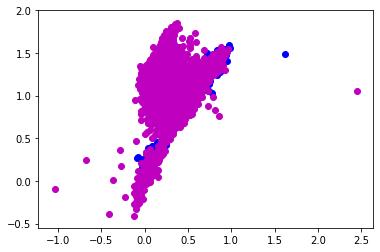

In [12]:
plt.scatter(df2.uJAVA_J0378, df2.uJAVA_J0410, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.uJAVA_J0410, color = 'm')

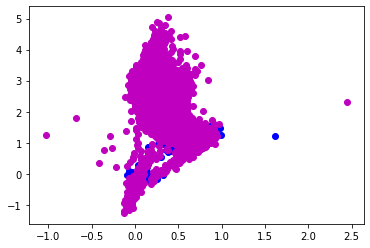

In [13]:
plt.scatter(df2.uJAVA_J0378, df2.uJAVA_J0660, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.uJAVA_J0660, color = 'm')

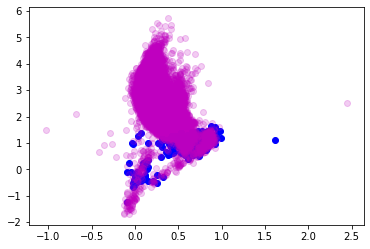

In [14]:
plt.scatter(df2.uJAVA_J0378, df2.uJAVA_J0861, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.uJAVA_J0861, color = 'm', alpha = 0.2)

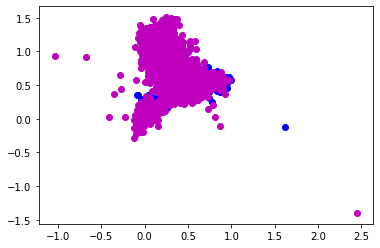

In [15]:
plt.scatter(df2.uJAVA_J0378, df2.J0378_J0410, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.J0378_J0410, color = 'm')

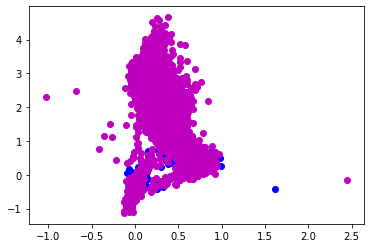

In [16]:
plt.scatter(df2.uJAVA_J0378, df2.J0378_J0660, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.J0378_J0660, color = 'm')

(-0.2, 1)

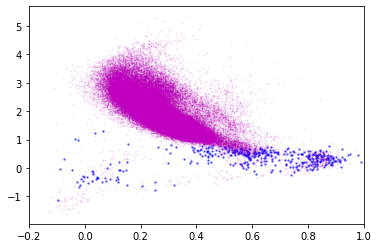

In [17]:
plt.scatter(df2.uJAVA_J0378, df2.J0378_J0861, color = 'b', alpha = 0.5, s = 2)
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.J0378_J0861, color = 'm', alpha = 0.1, s = 0.8)
plt.xlim(-0.2, 1)

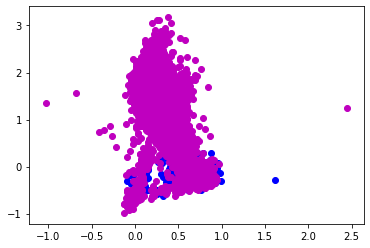

In [18]:
plt.scatter(df2.uJAVA_J0378, df2.J0410_J0660, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.J0410_J0660, color = 'm')

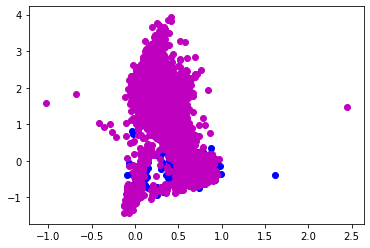

In [19]:
plt.scatter(df2.uJAVA_J0378, df2.J0410_J0861, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.J0410_J0861, color = 'm')

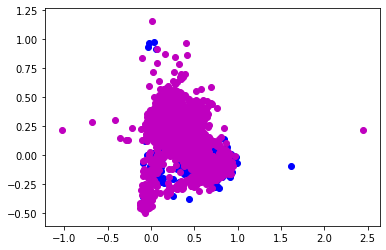

In [20]:
plt.scatter(df2.uJAVA_J0378, df2.J0660_J0861, color = 'b')
plt.scatter(dft_colors.uJAVA_J0378, dft_colors.J0660_J0861, color = 'm')

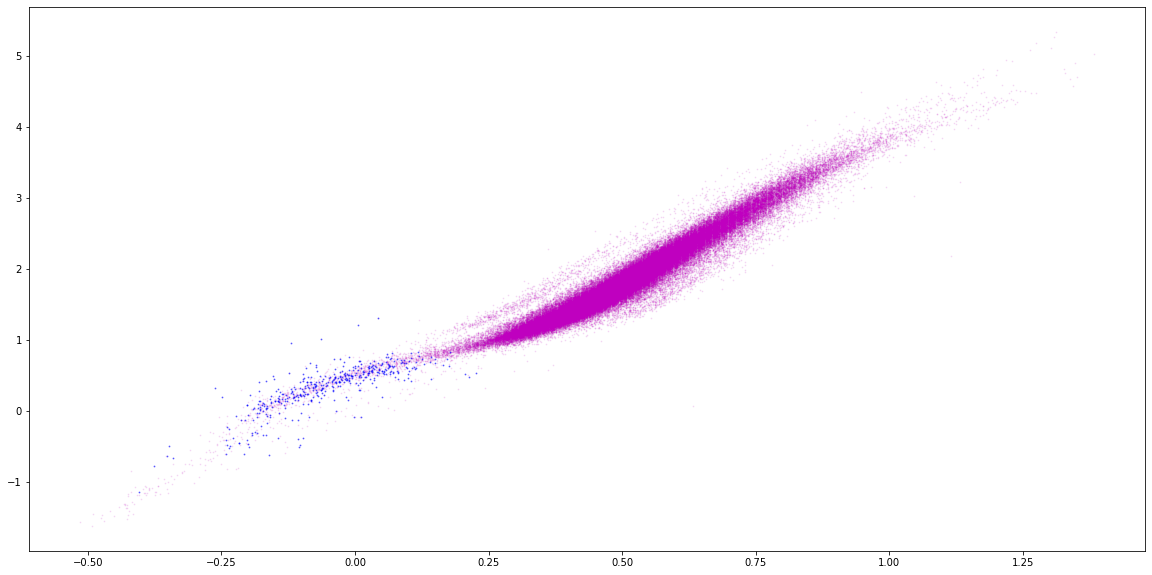

In [23]:
plt.figure(figsize = (20, 10))
plt.scatter(dft_colors.gSDSS_rSDSS, dft_colors.J0378_J0861, color = 'm', alpha = 0.1, s = 0.8)
plt.scatter(df2.gSDSS_rSDSS, df2.J0378_J0861, color = 'b', alpha = 0.5, s = 0.8)

#plt.xlim(-0.2, 1)


In [ ]:
# Gerar o rf de novo com o g-r
# Estabelecer um corte com base no g-r
# Gerar as previsoes de novo com base no g-r
# Temperaturas GAIA - 5 SEGUNDOS DE ARCO